# Detecting Issues in Image Datasets

This is the recommended quickstart tutorial for analyzing image datasets via Cleanlab Studio's [Python API](/guide/quickstart/api/). If you prefer to use the web interface and interactively browse/correct your data, see our other tutorial: [Finding Issues in Large-Scale Image Datasets](/tutorials/large_image_datasets)

In this tutorial, we demonstrate the metadata Cleanlab Studio automatically generates for any image classification dataset. This metadata (returned as [Cleanlab Columns](/guide/concepts/cleanlab_columns)) helps you discover various problems in your dataset and understand their severity. This entire notebook is run using the `cleanlab_studio` Python package, so you can audit your datasets programmatically.

## Install and import dependencies

Make sure you have `wget` and `zip` installed to run this tutorial. You can use pip to install all other packages required for this tutorial as follows:

In [ ]:
!pip install cleanlab-studio Pillow

In [42]:
import numpy as np
import os

## Load dataset into Cleanlab Studio

To fetch the data for this tutorial, make sure you have `wget` and `zip` installed.

In [ ]:
!wget -nc 'https://cleanlab-public.s3.amazonaws.com/Datasets/caltech256-image-quickstart.zip'
!mkdir -p data
!unzip -q caltech256-image-quickstart.zip

The dataset we will use is a subset of the well-known [Caltech 256](https://data.caltech.edu/records/nyy15-4j048) image dataset. This is a **multi-class classification** dataset where each image is labeled as belonging to one of *K* classes. We have downloaded the dataset and created a local ZIP file which is one of the supported formats. 

### Dataset Folder Structure
Upon unzipping the `caltech256-image-quickstart.zip` file, you will discover the directory named `caltech256-image-quickstart/`. Inside this directory, the dataset is organized with images sorted by their respective classes in separate subdirectories. The structure is as follows:

```bash
caltech256-image-quickstart/     # Main directory after unzipping the archive.
|
|-- frog/                        # This is the first class directory.
|   |-- <image_filename_1>.jpg   # Example of an image filename inside the "frog" class directory.
|   |-- <image_filename_2>.jpg   # Another example of an image filename.
|   |-- ...
|
|-- ibis/                        # This is the second class directory.
|   |-- <image_filename_1>.jpg   # Example of an image filename inside the "ibis" class directory.
|   |-- <image_filename_2>.jpg
|   |-- ...
|
|-- penguin/                     # Yet another class directory.
|   |-- <image_filename_1>.jpg   # Example of an image filename inside the "penguin" class directory.
|   |-- <image_filename_2>.jpg
|   |-- ...
|
|-- ...                          # Additional class directories follow the same structure.

```

Understanding this structure is important, especially if you intend to format your own dataset in a similar manner.

You can similarly format any other image dataset and run the rest of this tutorial. Details on how to format your dataset can be found in [this guide](/guide/concepts/datasets/), which also outlines other format options.

**Note:** To work with big datasets more quickly, we recommend you host them as *external media* (e.g. in cloud storage as demonstrated in [this tutorial](/tutorials/large_image_datasets)) rather than a local ZIP file.

In [44]:
BASE_PATH = os.getcwd()

dataset_path = os.path.join(BASE_PATH, "caltech256-image-quickstart")
dataset_zip_path = dataset_path + ".zip"

Use your API key to instantiate a `studio` object, which can be used to analyze your dataset.

In [45]:
from cleanlab_studio import Studio

# you can find your Cleanlab Studio API key by going to app.cleanlab.ai/upload,
# clicking "Upload via Python API", and copying the API key there
API_KEY = "<insert your API key>"

# initialize studio object
studio = Studio(API_KEY)

Next load the dataset into Cleanlab Studio (more details/options can be found in [this guide](/guide/quickstart/api/#uploading-a-dataset)). This may take a while for big datasets.

In [ ]:
dataset_id = studio.upload_dataset(dataset_zip_path, dataset_name="caltech256")
print(f"Dataset ID: {dataset_id}")

## Launch a Project

We will then create a project using this dataset. A Cleanlab Studio project automatically trains ML models to provide AI-based analysis of your dataset.

In [ ]:
project_id = studio.create_project(
    dataset_id=dataset_id,
    project_name="caltech256 project",
    modality="image",
    task_type="multi-class",
    model_type="regular",
)
print(f"Project successfully created and ML training has begun! project_id: {project_id}")

Once the project has been launched successfully and you see your `project_id` you can feel free to close this notebook. It will take some time for Cleanlab’s AI to train on your data and analyze it. Come back after training is complete (you will receive an email) and continue with the notebook to review your results.

You should only execute the above cell once per dataset. After launching the project, you can poll for its status to programmatically wait until the results are ready for review. Each project creates a [cleanset](/guide/concepts/cleanset/), an improved version of your original dataset that contains additional metadata for helping you clean up the data. The next code cell simply waits until this [cleanset](/guide/concepts/cleanset) has been created.

**Warning!** For big datasets, this next cell may take a long time to execute while Cleanlab's AI model is training. If your Jupyter notebook has timed out during this process then you can resume work by re-running the below cell (which should return instantly if the project has completed training; do not create a new Project).

In [ ]:
cleanset_id = studio.get_latest_cleanset_id(project_id)
print(f"cleanset_id: {cleanset_id}")
studio.wait_until_cleanset_ready(cleanset_id)

Once the above cell completes execution, your project results are ready for review!  At this point, you can optionally view your project in the [Cleanlab Studio web interface](https://app.cleanlab.ai/) and interactively improve your dataset. However this tutorial will stick with a fully programmatic workflow.

## Download Cleanlab columns

We can fetch the [Cleanlab columns](/guide/concepts/cleanlab_columns/) that contain the metadata of this [cleanset](/guide/concepts/cleanset) using its `cleanset_id`. These columns have the same length as your original dataset and provide metadata about each indiviudal data point, like what types of issues it exhibits and how severely.

If at any point you want to re-run the remaining parts of this notebook (without creating another project), simply call `studio.download_cleanlab_columns(cleanset_id)` with the `cleanset_id` printed from the previous cell.

In [50]:
cleanlab_columns_df = studio.download_cleanlab_columns(cleanset_id)
cleanlab_columns_df.head()

,id,corrected_label,is_label_issue,label_issue_score,suggested_label,is_ambiguous,ambiguous_score,is_well_labeled,is_near_duplicate,near_duplicate_score,near_duplicate_cluster_id,is_outlier,outlier_score,is_initially_unlabeled
0,frog/080_0001.jpg,<NA>,False,0.150223,<NA>,False,0.656981,True,False,0.939302,<NA>,False,0.095437,False
1,frog/080_0002.jpg,<NA>,False,0.147598,<NA>,False,0.644982,True,False,0.902937,<NA>,False,0.114250,False
2,frog/080_0003.jpg,<NA>,False,0.209057,<NA>,False,0.669765,True,False,0.917172,<NA>,False,0.102849,False
3,frog/080_0004.jpg,<NA>,False,0.166520,<NA>,False,0.670291,True,False,0.926575,<NA>,False,0.102619,False
4,frog/080_0005.jpg,<NA>,False,0.320285,<NA>,False,0.726398,False,False,0.776399,<NA>,False,0.215013,False


## Review detected data issues

Details about all of the Cleanlab columns and their meanings can be found in [this guide](/guide/concepts/cleanlab_columns/). Here we briefly showcase some of the Cleanlab columns that correspond to issues detected in our tutorial dataset:
- **Label issue** indicates the given label of this data point is likely wrong. For such data, consider correcting their label to the `suggested_label` if it seems more appropriate.
- **Ambiguous** indicates this data point does not clearly belong to any of the classes (e.g. a borderline case). Multiple human annotators might disagree on how to label this data point, so you might consider refining your annotation instructions to clarify how to handle data points like this.
- **Outlier** indicates this data point is very different from the rest of the data (looks atypical). The presence of outliers may indicate problems in your data sources, consider deleting such data from your dataset if appropriate.
- **Near duplicate** indicates there are other data points that are (exactly or nearly) identical to this data point. Duplicated data points can have an outsized impact on models/analytics, so consider deleting the extra copies from your dataset if appropriate.

The data points exhibiting each type of issue are indicated with boolean values in the respective `is_<issue>` column, and the severity of this issue in each data point is quantified in the respective `<issue>_score` column (on a scale of 0-1 with 1 indicating the most severe instances of the issue).

Let's go through some of the Cleanlab columns and types of data issues, starting with label issues (i.e. mislabeled data). We first create a `given_label` column in our dataframe to clearly indicate the original class label originally assigned to each image in this dataset.


In [51]:
def get_label_for_example(row):
    """A helper function to extract the label from row id."""
    return row["id"].split("/")[0]

# create a given label column
cleanlab_columns_df["given_label"] = cleanlab_columns_df.apply(get_label_for_example, axis=1)

We'll also add an image column that allows us to view the images in this tutorial notebook as part of the dataframe.

In [83]:
# code to render id column of DataFrame as images in a separate column

from PIL import Image
from io import BytesIO
from base64 import b64encode
from IPython.display import HTML

def path_to_img_html(path: str) -> str:
    buf = BytesIO()
    Image.open(path).save(buf, format='JPEG')
    b64 = b64encode(buf.getvalue()).decode('utf8')
    return f'<img src="data:image/jpeg;base64,{b64}" width="175px" alt="" />'

def display(df):
    image_column = "image"
    df_copy = df.copy()
    df_copy[image_column] = df_copy["id"].apply(lambda x: dataset_path + "/" + x)

    # Rearrange columns to move image_column right behind "id"
    columns = list(df_copy.columns)
    columns.remove(image_column)
    columns.insert(1, image_column)
    df_copy = df_copy[columns]
    return HTML(df_copy.to_html(escape=False, formatters=dict(image=path_to_img_html)))

To see which images are estimated to be mislabeled, we filter by `is_label_issue`. We sort by `label_issue_score` to see which of these images are *most likely* mislabeled.

,id,image,label_issue_score,is_label_issue,given_label,suggested_label
514,toad/158_0014.jpg,,0.939187,True,toad,penguin
113,ibis/080_0064.jpg,,0.786315,True,ibis,frog
523,toad/256_0009.jpg,,0.723394,True,toad,frog
619,toad/257_0155.jpg,,0.598383,True,toad,swan

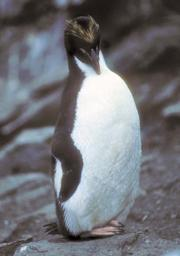
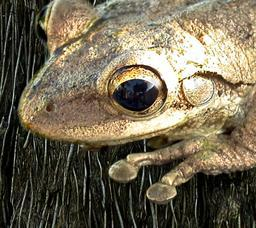
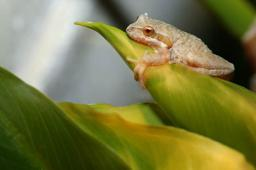
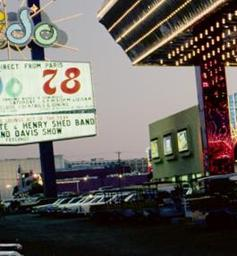

In [84]:
samples_ranked_by_label_issue_score = cleanlab_columns_df.query("is_label_issue").sort_values("label_issue_score", ascending=False)

columns_to_display = ["id", "label_issue_score", "is_label_issue", "given_label", "suggested_label"]
display(samples_ranked_by_label_issue_score.head(5)[columns_to_display])

Note that in each of these images, the `given_label` really does seem wrong. Data labeling is an error-prone process and annotators make mistakes! Luckily we can easily correct these data points by just using Cleanlab's `suggested_label` above, which seems like a much more suitable label in most cases.

While the boolean flags above can help estimate the overall label error rate, the numeric scores help decide what data to prioritize for review. You can alternatively ignore these boolean `is_label_issue` flags and filter the data by thresholding the `label_issue_score` yourself (if say you find the default thresholds produce false positives/negatives).

Next, let's look at the ambiguous examples in the dataset.

,id,image,ambiguous_score,is_ambiguous,given_label,suggested_label
238,penguin/049_0013.jpg,,0.989128,True,penguin,
512,toad/023_0012.jpg,,0.985627,True,toad,
513,toad/023_0100.jpg,,0.985627,True,toad,
387,penguin/257_0123.jpg,,0.975247,True,penguin,
235,ibis/257_0287.jpg,,0.973924,True,ibis,
619,toad/257_0155.jpg,,0.973217,True,toad,swan

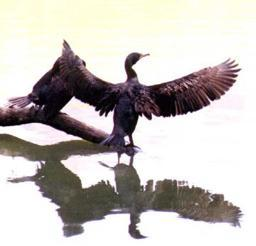
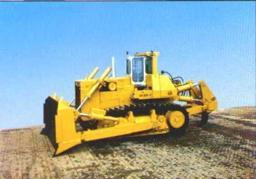
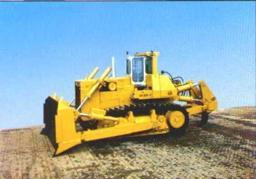
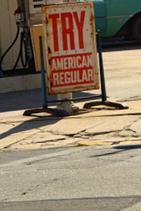
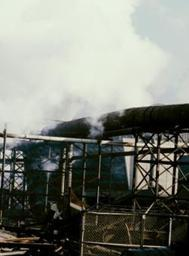
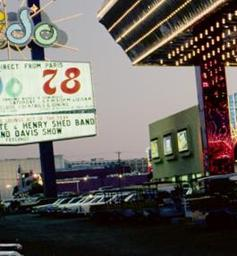

In [85]:
samples_ranked_by_ambiguous_score = cleanlab_columns_df.query("is_ambiguous").sort_values("ambiguous_score", ascending=False)

columns_to_display = ["id", "ambiguous_score", "is_ambiguous", "given_label", "suggested_label"]
display(samples_ranked_by_ambiguous_score.head(6)[columns_to_display])

Next, let's look at the outliers in the dataset.

,id,image,outlier_score,is_outlier,given_label,suggested_label
392,swan/043_0116.jpg,,0.345775,True,swan,
391,swan/043_0115.jpg,,0.345775,True,swan,
109,frog/137_0114.jpg,,0.341197,True,frog,
110,frog/137_0123.jpg,,0.341197,True,frog,
619,toad/257_0155.jpg,,0.316071,True,toad,swan

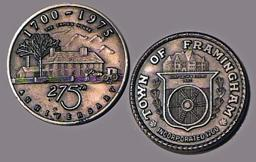
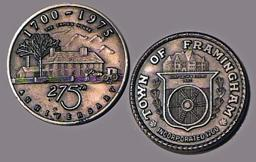
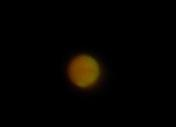
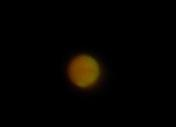
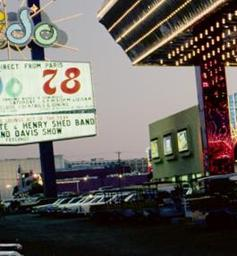

In [86]:
samples_ranked_by_outlier_score = cleanlab_columns_df.query("is_outlier").sort_values("outlier_score", ascending=False)

columns_to_display = ["id", "outlier_score", "is_outlier", "given_label", "suggested_label"]
display(samples_ranked_by_outlier_score.head(5)[columns_to_display])

Next, let's look at the near duplicates in the dataset.

In [69]:
n_near_duplicate_sets = len(set(cleanlab_columns_df.loc[cleanlab_columns_df["near_duplicate_cluster_id"].notna(), "near_duplicate_cluster_id"]))
print(f"There are {n_near_duplicate_sets} sets of near duplicate images in the dataset.")

There are 7 sets of near duplicate images in the dataset.


Note that the near duplicate data points each have an associated `near_duplicate_cluster_id` integer.  Data points that share the same IDs are near duplicates of each other, so you can use this column to find the near duplicates of any data point. And remember the near duplicates also include *exact* duplicates as well (which have `near_duplicate_score` $=1$).
 
Let's check out the near duplicates with id $= 6$:

,id,image,near_duplicate_score,is_near_duplicate,given_label,near_duplicate_cluster_id
515,toad/256_0001.jpg,,0.989873,True,toad,6
530,toad/256_0016.jpg,,0.989873,True,toad,6

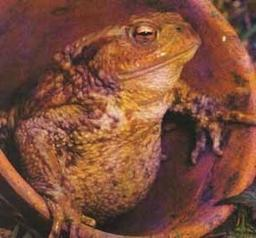
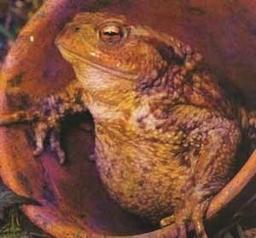

In [87]:
near_duplicate_cluster_id = 6  # play with this value to see other sets of near duplicates
selected_samples_by_near_duplicate_cluster_id = cleanlab_columns_df.query("near_duplicate_cluster_id == @near_duplicate_cluster_id")

columns_to_display = ["id", "near_duplicate_score", "is_near_duplicate", "given_label", "near_duplicate_cluster_id"]
display(selected_samples_by_near_duplicate_cluster_id[columns_to_display])

## Improve the dataset based on the detected issues

Since the results of this analysis appear reasonable, let's use the Cleanlab columns to improve the quality of our dataset. For your own datasets, which actions you should take to remedy the detected issues will depend on what you are using the data for. No action may be the best choice for certain datasets, we caution against blindly copying the actions we perform below. 

For data marked as `label_issue`, we create a new `corrected_label` column, which will be the given label for data without detected label issues, and the `suggested_label` for data with detected label issues.

In [71]:
corrected_label = np.where(cleanlab_columns_df["is_label_issue"],
                           cleanlab_columns_df["suggested_label"],
                           cleanlab_columns_df["given_label"])

For data marked as outlier or ambiguous, we will simply exclude them from our dataset. Here we create a boolean vector `rows_to_exclude` to track which images will be excluded.

In [72]:
rows_to_exclude = cleanlab_columns_df["is_outlier"] | cleanlab_columns_df["is_ambiguous"]

For each set of near duplicates, we only want to keep one of the data points that share a common `near_duplicate_cluster_id` (so that the resulting dataset will no longer contain any near duplicates).

In [73]:
near_duplicates_to_exclude = cleanlab_columns_df['is_near_duplicate'] & cleanlab_columns_df['near_duplicate_cluster_id'].duplicated(keep='first')

rows_to_exclude |= near_duplicates_to_exclude

We can check the total amount of excluded data:

In [61]:
print(f"Excluding {rows_to_exclude.sum()} images (out of {len(cleanlab_columns_df)})")

Excluding 29 images (out of 622)


Finally, let's actually make a new version of our dataset with these changes. 

We craft a new dataframe from the original, applying corrections and exclusions, and then use this dataframe to save the new dataset in a separate directory. The new dataset is a directory that looks just like our original dataset -- you can use it as a plug-in replacement to get more reliable results in your ML and Analytics pipelines without any change in your existing pipelines.

**Caution:** With local image datasets, make sure to verify the source and output directory paths to avoid overwriting or mixing data, confirm there’s sufficient disk space to store the new dataset, and give your settings a once-over before saving the new dataset.

In [62]:
new_dataset_directory = "improved_dataset"  # where to save the new dataset (image files will be copied over)

In [63]:
import csv
import shutil

def export_adjusted_dataset(filepaths, labels, source_root_dir, output_dir, zip_output=True):
    """Copies fixed image dataset to a new output directory. Optionally zips the output directory."""
    
    if len(filepaths) != len(labels):
        raise ValueError("The number of source filepaths and labels should be the same.")
    
    if os.path.abspath(source_root_dir) == os.path.abspath(output_dir):
        raise ValueError("The input and output directories should not be the same.")
    
    if os.path.exists(output_dir):
        raise ValueError(f"Directory {output_dir} already exists. Cannot overwite so please delete it first, or specify a different output_dir.")
    
    # Initialize a dictionary to keep track of the mappings
    mappings = {}
    
    # Iterate over the filepaths and labels
    for filepath, label in zip(filepaths, labels):
        source_path = os.path.join(source_root_dir, filepath)
        target_dir = os.path.join(output_dir, label)
        
        # Create the target directory if it doesn't exist
        os.makedirs(target_dir, exist_ok=True)
        
        # Define the initial target path
        target_filename = os.path.basename(filepath)
        target_path = os.path.join(target_dir, target_filename)
        
        # Handle filename collisions
        counter = 1
        while os.path.exists(target_path):
            # Append a unique identifier to the filename
            target_filename = f"{os.path.splitext(os.path.basename(filepath))[0]}_{counter}{os.path.splitext(filepath)[1]}"
            target_path = os.path.join(target_dir, target_filename)
            counter += 1
            
        # Copy the image to the new directory
        shutil.copy2(source_path, target_path)
        
        # Save the mapping
        mappings[filepath] = os.path.relpath(target_path, output_dir)
        
    # Save the filename mappings to a CSV file
    csv_columns = ["source_path", "target_path"]
    with open(os.path.join(output_dir, 'mappings.csv'), 'w') as f:
        writer = csv.DictWriter(f, fieldnames=csv_columns)
        writer.writeheader()
        for key, value in mappings.items():
            writer.writerow({'source_path': key, 'target_path': value})
    
    # Zip the new directory if zip_output is True
    if zip_output:
        shutil.make_archive(output_dir, 'zip', output_dir)
        return f"{output_dir}.zip"
    else:
        return output_dir


In [ ]:
# Fetch the original dataset
fixed_dataset = cleanlab_columns_df[["id"]].copy()

# Add the corrected label column 
fixed_dataset["label"] = corrected_label

# Automatically exclude selected rows
fixed_dataset = fixed_dataset[~rows_to_exclude]

# Save the adjusted dataset to disk
output_path = export_adjusted_dataset(
    filepaths=fixed_dataset["id"],
    labels=fixed_dataset["label"],
    source_root_dir=dataset_path,
    output_dir=new_dataset_directory,
    zip_output=True,
)
print(f"Improved dataset saved to {output_path}")